In [ ]:
import numpy as np
import pandas as pd
import geopandas as gpd
from bokeh.io import curdoc
from bokeh.models import (ColorBar, ColumnDataSource,
                          GeoJSONDataSource, HoverTool,
                          LinearColorMapper, Slider, Select,
                          TableColumn, DataTable)
from bokeh.layouts import grid
from bokeh.palettes import brewer
from bokeh.plotting import figure

In [ ]:
df = pd.read_csv('data/players_active.csv')
df.head()

,player_id,last_season,current_club_id,name,pretty_name,country_of_birth,country_of_citizenship,date_of_birth,position,sub_position,foot,height_in_cm,market_value_in_gbp,highest_market_value_in_gbp,url,age
0,485658,2021,1083,kirill-folmer,Kirill Folmer,Russia,Russia,2000-02-25,Midfield,midfield - Central Midfield,Left,178,360000.0,450000.0,https://www.transfermarkt.co.uk/kirill-folmer/...,21
1,334998,2021,65,robin-kehr,Robin Kehr,Germany,Germany,2000-02-22,Attack,attack - Centre-Forward,Left,189,135000.0,135000.0,https://www.transfermarkt.co.uk/robin-kehr/pro...,21
2,596813,2021,65,dickson-abiama,Dickson Abiama,Nigeria,Nigeria,1998-11-03,Attack,attack - Centre-Forward,Right,184,810000.0,810000.0,https://www.transfermarkt.co.uk/dickson-abiama...,23
3,448177,2021,65,jessic-ngankam,Jessic Ngankam,Germany,Germany,2000-07-20,Attack,attack - Centre-Forward,Right,184,1080000.0,1080000.0,https://www.transfermarkt.co.uk/jessic-ngankam...,21
4,410649,2021,65,afimico-pululu,Afimico Pululu,Angola,Angola,1999-03-23,Attack,attack - Centre-Forward,Left,175,1350000.0,2700000.0,https://www.transfermarkt.co.uk/afimico-pululu...,22


In [ ]:
gdf = gpd.read_file('map/ne_110m_admin_0_countries.shp')[['ADMIN', 'geometry']]
gdf.columns = ['country', 'geometry']
gdf.head()

,country,geometry
0,Fiji,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,United Republic of Tanzania,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Western Sahara,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Canada,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,United States of America,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [ ]:
gdf_merge = gdf.merge(df, left_on='country', right_on='country_of_birth')
gdf_merge.head()

,country,geometry,player_id,last_season,current_club_id,name,pretty_name,country_of_birth,country_of_citizenship,date_of_birth,position,sub_position,foot,height_in_cm,market_value_in_gbp,highest_market_value_in_gbp,url,age
0,Canada,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",54716,2021,979,steven-vitoria,Steven Vitoria,Canada,Canada,1987-01-11,Defender,Defender - Centre-Back,Right,195,90000.0,3420000.0,https://www.transfermarkt.co.uk/steven-vitoria...,34
1,Canada,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",503782,2021,2759,ben-paton,Ben Paton,Canada,Canada,2000-05-05,Midfield,midfield - Left Midfield,Left,176,90000.0,90000.0,https://www.transfermarkt.co.uk/ben-paton/prof...,21
2,Canada,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",395833,2021,2759,harry-paton,Harry Paton,Canada,Canada,1998-05-23,Midfield,midfield - Central Midfield,Right,175,360000.0,360000.0,https://www.transfermarkt.co.uk/harry-paton/pr...,23
3,Canada,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",303254,2021,5,fikayo-tomori,Fikayo Tomori,Canada,England,1997-12-19,Defender,Defender - Centre-Back,Right,185,40500000.0,40500000.0,https://www.transfermarkt.co.uk/fikayo-tomori/...,24
4,Canada,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",328609,2021,6418,derek-cornelius,Derek Cornelius,Canada,Canada,1997-11-25,Defender,Defender - Centre-Back,Both,187,630000.0,630000.0,https://www.transfermarkt.co.uk/derek-corneliu...,24


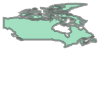

In [ ]:
gdf_merge['geometry'][0]

In [ ]:
gdf_map = gdf_merge.copy()
gdf_map.drop_duplicates(subset=['country'], keep='first', inplace=True)
gdf_map = gdf_map[['country', 'geometry']]
gdf_map.head()

,country,geometry
0,Canada,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
12,Kazakhstan,"POLYGON ((87.35997 49.21498, 86.59878 48.54918..."
18,Uzbekistan,"POLYGON ((55.96819 41.30864, 55.92892 44.99586..."
22,Indonesia,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ..."
23,Argentina,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."


In [ ]:
count_players_df = pd.DataFrame(df['country_of_birth'].value_counts()).reset_index()
count_players_df.columns = ['country', 'counts']
count_players_df.head()

,country,counts
0,France,564
1,Spain,418
2,Netherlands,390
3,Germany,373
4,England,339


In [ ]:
gdf_map =  gdf_map.merge(count_players_df, left_on='country', right_on='country')
gdf_map.head()

,country,geometry,counts
0,Canada,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",12
1,Kazakhstan,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",6
2,Uzbekistan,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...",4
3,Indonesia,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ...",1
4,Argentina,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000...",113


In [ ]:
# Additional, Showing plot in notebook
from bokeh.io import output_notebook, show
output_notebook()

# Input GeoJSON source that contains features for plotting
geosource = GeoJSONDataSource(geojson = gdf_map.to_json())

# Define color palettes
palette = brewer['BuGn'][6]
palette = palette[::-1]

# Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors.
color_mapper = LinearColorMapper(palette = palette, low = 0, high = 600)

# Define custom tick labels for color bar.
tick_labels = {'0': '0', '100': '100',
               '200': '200', '300': '300',
               '400': '400', '500': '500',
               '600': '600'
               }
# Create color bar.
color_bar = ColorBar(color_mapper = color_mapper, 
                     label_standoff = 6,
                     width = 500, height = 20,
                     border_line_color = None,
                     location = (0,0), 
                     orientation = 'horizontal',
                     major_label_overrides = tick_labels)
               
# Create figure object.
p = figure(title = 'World Active Football Player Distribution Map, 2021', 
           plot_height = 600,
           plot_width = 950, 
           toolbar_location = 'below',
           tools = "pan, wheel_zoom, box_zoom, reset")
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None

# Add patch renderer to figure.
country = p.patches('xs','ys', source = geosource,
                   fill_color = {'field': 'counts',
                                 'transform' : color_mapper},
                   line_color = 'gray', 
                   line_width = 0.25, 
                   fill_alpha = 1)
# Create hover tool
p.add_tools(HoverTool(renderers = [country],
                      tooltips = [('Country','@country'),
                                ('Population','@counts')]))
# Specify layout
p.add_layout(color_bar, 'below')
show(p)

In [ ]:
# Import data of football players 
p_df = pd.read_csv('data/final.csv')
p_df.head()

,country,pretty_name,position,market_value_in_gbp,age,LongitudeMeasure,LatitudeMeasure,value
0,Canada,Steven Vitoria,Defender,90000.0,34,-65.409985,45.702418,"90,000.0"
1,Canada,Ben Paton,Midfield,90000.0,21,-69.419570,54.749199,"90,000.0"
2,Canada,Harry Paton,Midfield,360000.0,23,-128.833791,66.057089,"360,000.0"
3,Canada,Fikayo Tomori,Defender,40500000.0,24,-86.303989,73.580319,"40,500,000.0"
4,Canada,Derek Cornelius,Defender,630000.0,24,-77.176992,58.396808,"630,000.0"


In [ ]:
sitesource = ColumnDataSource(p_df)

In [ ]:
# Plots the football players 
sites = p.circle('LongitudeMeasure', 'LatitudeMeasure', source = sitesource, color = 'red', 
                 size = 5, alpha = 0.3)
# Add hover tool
p.add_tools(HoverTool(renderers = [sites],
                      tooltips = [
                                  ('Name', '@pretty_name'),
                                  ('Age', '@age'),
                                  ('Country', '@country'),
                                  ('Position', '@position'),
                                  ('Market Value in £ (Pounds)', '@value'),
                                  ]))
show(p)

In [ ]:
def update(attr, old, new):
    df_temp = p_df.copy() 
    age = slider.value
    option = opt_select.value
    country = ct_select.value
    if option == 'Default':
        slider.visible = False
        df_temp = p_df.copy()
    else:
        slider.visible = True
        df_temp = p_df[p_df['age'] == int(age)]
    
    if country == 'All':
        table.visible = True
        df_temp = df_temp
    elif country == 'Only Populations':
        table.visible = False
        df_temp = df_temp[df_temp['country'] == '']
    else:
        table.visible = True
        df_temp = df_temp[df_temp['country'] == country]
    sitesource.data = df_temp

In [ ]:
# Creating Slider
slider = Slider(title='Age', start=16, end=40, step=1, value=16)

# Changing value
slider.on_change('value', update)

# Create a dropdown Select widget for the show option: opt_select
opt_select = Select(
    options=['Default', 'Filter by Age'],
    value='Default',
    title='Optional'
)
# Attach the update_plot callback to the 'value' property of opt_select
opt_select.on_change('value', update)

# Get country
countries = list(np.unique(np.array(p_df['country'])))
countries.insert(0, 'Only Populations')
countries.insert(0, 'All')

# Create a dropdown Select widget for the countries data: ct_select
ct_select = Select(
    options=countries,
    value='All',
    title='Country',
    width=940
)
# Attach the update_plot callback to the 'value' property of ct_select
ct_select.on_change('value', update)

# Create column for table
columns = [
    TableColumn(field="pretty_name", title="Name"),
    TableColumn(field="age", title="Age"),
    TableColumn(field="country", title="Country"),
    TableColumn(field="position", title="Position"),
    TableColumn(field="market_value_in_gbp", title="Market Value in £"),
]

table = DataTable(source=sitesource, columns=columns, width=550, height=600)

# Make a column layout of widgetbox(slider) and plot, and add it to the current document
slider.visible = False
layout = grid([ct_select, [p, table], [opt_select, slider]])
show(layout)

You are generating standalone HTML/JS output, but trying to use real Python
callbacks (i.e. with on_change or on_event). This combination cannot work.

Only JavaScript callbacks may be used with standalone output. For more
information on JavaScript callbacks with Bokeh, see:

    https://docs.bokeh.org/en/latest/docs/user_guide/interaction/callbacks.html

Alternatively, to use real Python callbacks, a Bokeh server application may
be used. For more information on building and running Bokeh applications, see:

    https://docs.bokeh.org/en/latest/docs/user_guide/server.html

